<a href="https://colab.research.google.com/github/Yuvaneshwar555/PRODIGY/blob/main/tasks_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample Data:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m

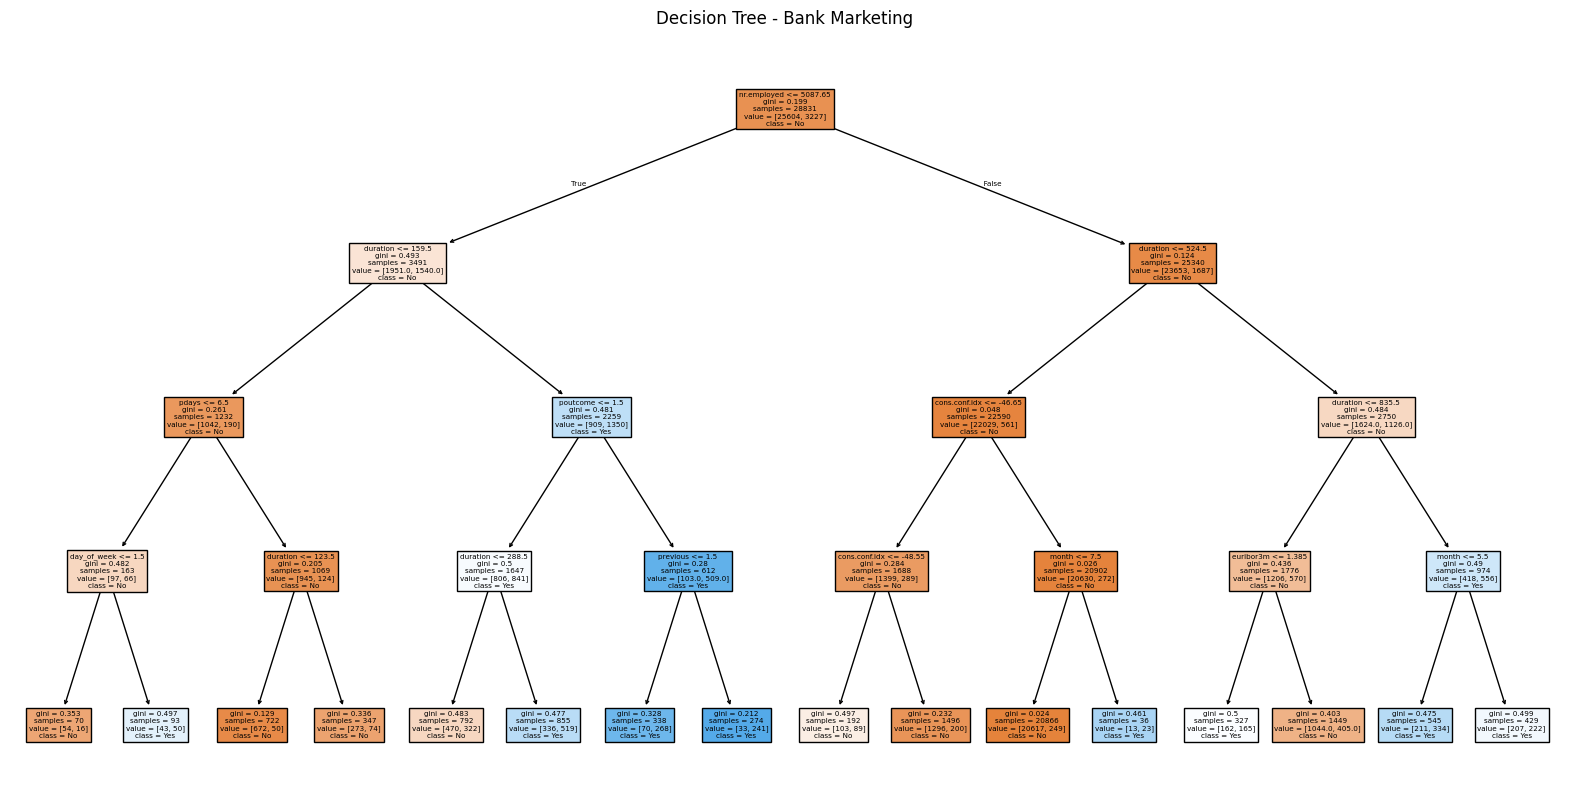

In [ ]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

# Step 2: Load dataset (CSV should be extracted and named 'bank-full.csv')
# Correcting the file path to use the extracted file
df = pd.read_csv("bank-additional/bank-additional-full.csv", sep=';')  # UCI uses ';' separator

# Step 3: Quick look at data
print("Sample Data:")
print(df.head())

# Step 4: Convert categorical columns to numbers (used LabelEncoder - saw this on YouTube )
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

# Step 5: Split data into input and target
X = df.drop("y", axis=1)
y = df["y"]

# Step 6: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Step 7: Build the model (Decision Tree)
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = model.predict(X_test)

# Step 9: Check accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\n\ Model Accuracy: {acc * 100:.2f}%")

# Step 10: Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 11: Visualize the tree (this part looked cool in the tutorials )
plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.title("Decision Tree - Bank Marketing")
plt.show()

In [ ]:
import requests

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"
filename = "bank-additional.zip"

response = requests.get(url)
response.raise_for_status() # Raise an exception for bad status codes
with open(filename, "wb") as f:
    f.write(response.content)

print("Downloaded bank-additional.zip")

Downloaded bank-additional.zip


In [ ]:
import zipfile

with zipfile.ZipFile("bank-additional.zip", "r") as zip_ref:
    zip_ref.extractall(".")
print("Extracted bank-additional.zip")

Extracted bank-additional.zip
